In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate
import warnings

warnings.filterwarnings("ignore")

### Распределение Коши:

$\phi(x) = \frac{1}{\pi} \frac{\gamma}{(x - x_0)^2 + \gamma^2}$

$F(x) = \frac{1}{\pi} \text{arctg} \left( \frac{x - x_0}{\gamma} \right) + \frac{1}{2}$

$\text{ppf}(q) = x_0 + \gamma \cdot \tan \left( \pi \left( q - \frac{1}{2} \right) \right)$

In [ ]:
class CauchyDist(rv_continuous):
    def __init__(self, loc=0, scale=1, **kwargs):
        super().__init__(**kwargs)
        
        self.loc = loc
        self.scale = scale

    def _pdf(self, x):
        x0, g = self.loc, self.scale

        return (1 / np.pi) * (g / ((x - x0) ** 2 + g**2))

    def _cdf(self, x):
        x0, g = self.loc, self.scale
        
        return (1 / np.pi) * np.arctan((x - x0) / g) + 1 / 2
    
    # def _ppf(self, q):
    #     x0, g = self.loc, self.scale
        
    #     return x0 + g * np.tan(np.pi * (q - 1/2))

In [11]:
cauchy_full = CauchyDist(name="cauchy")

integral, error = integrate.quad(cauchy_full.pdf, -np.inf, np.inf)

assert np.isclose(integral, 1)
assert np.isclose(error, 0)

print("Условие нормировки выполнено")

left, right = cauchy_full.cdf(-np.inf), cauchy_full.cdf(np.inf)

assert np.isclose(left, 0)
assert np.isclose(right, 1)

print("Граничные условия выполнены")

Условие нормировки выполнено
Граничные условия выполнены


In [12]:
mean, var, skew, kurtosis = cauchy_full.stats(moments="mvsk")

print(f"M(X) = {mean:.4f}")
print(f"D(X) = {var:.4f}")
print(f"A(X) = {skew:.4f}")
print(f"E(X) = {kurtosis:.4f}")

prob = cauchy_full.cdf(1) - cauchy_full.cdf(-1)

print(f"P(-1 < X < 1) = {prob:.4f}")
print(f"25%-квантиль: {cauchy_full.ppf(0.25):.4f}")
print(f"60%-точка: {cauchy_full.ppf(1 - 0.6):.4f}")

M(X) = -0.0000
D(X) = -1.0000
A(X) = nan
E(X) = nan
P(-1 < X < 1) = 0.5000
25%-квантиль: -1.0000
60%-точка: -0.3249


In [13]:
cauchy_trunc = CauchyDist(a=-2, b=2, name="cauchy_trunc")
samples = cauchy_trunc.rvs(size=10000)

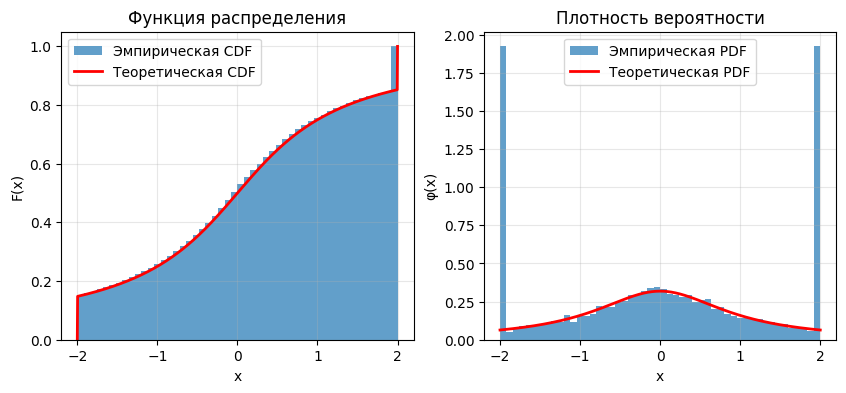

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

x_plot = np.linspace(-2, 2, 1000)

ax1.hist(
    samples, bins=50, density=True, cumulative=True, alpha=0.7, label="Эмпирическая CDF"
)

ax1.plot(x_plot, cauchy_trunc.cdf(x_plot), "r-", linewidth=2, label="Теоретическая CDF")

ax1.set_xlabel("x")
ax1.set_ylabel("F(x)")
ax1.set_title("Функция распределения")
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(samples, bins=50, density=True, alpha=0.7, label="Эмпирическая PDF")

ax2.plot(x_plot, cauchy_trunc.pdf(x_plot), "r-", linewidth=2, label="Теоретическая PDF")

ax2.set_xlabel("x")
ax2.set_ylabel("φ(x)")
ax2.set_title("Плотность вероятности")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()